# III) Extract surname from passport 

In [1]:
import cv2
import imutils
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
from pytesseract import Output
import pprint

In [2]:
def show(img):
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    plt.show()

In [3]:
results = {
           "Surname": {"ROI": None, "Processed ROI": None, "Text": None, "Confidence": None, "Average Confidence": None},
           "Name": {"ROI": None, "Processed ROI": None, "Text": None, "Confidence": None, "Average Confidence": None},
           "Patronymic": {"ROI": None, "Processed ROI": None, "Text": None, "Confidence": None, "Average Confidence": None},
           "MRZ": {"ROI": None, "Processed ROI": None, "Text": None, "Confidence": None, "Average Confidence": None}
          }

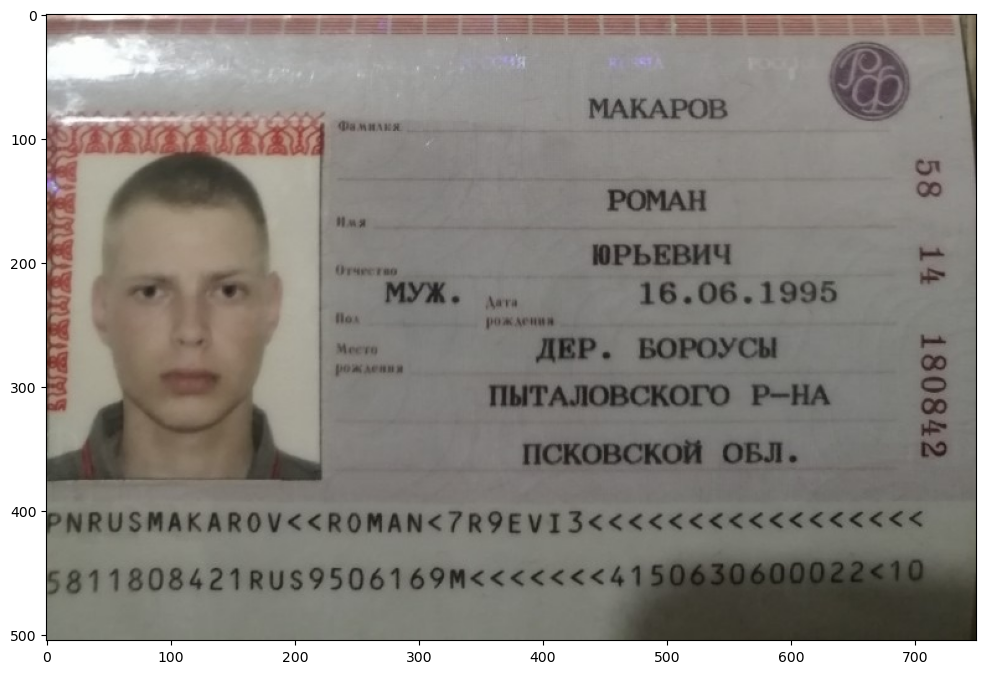

In [4]:
img = cv2.imread('id_examples/Sample_UK_Passports/5.jpeg')
img = img[:,:,::-1]
show(img)

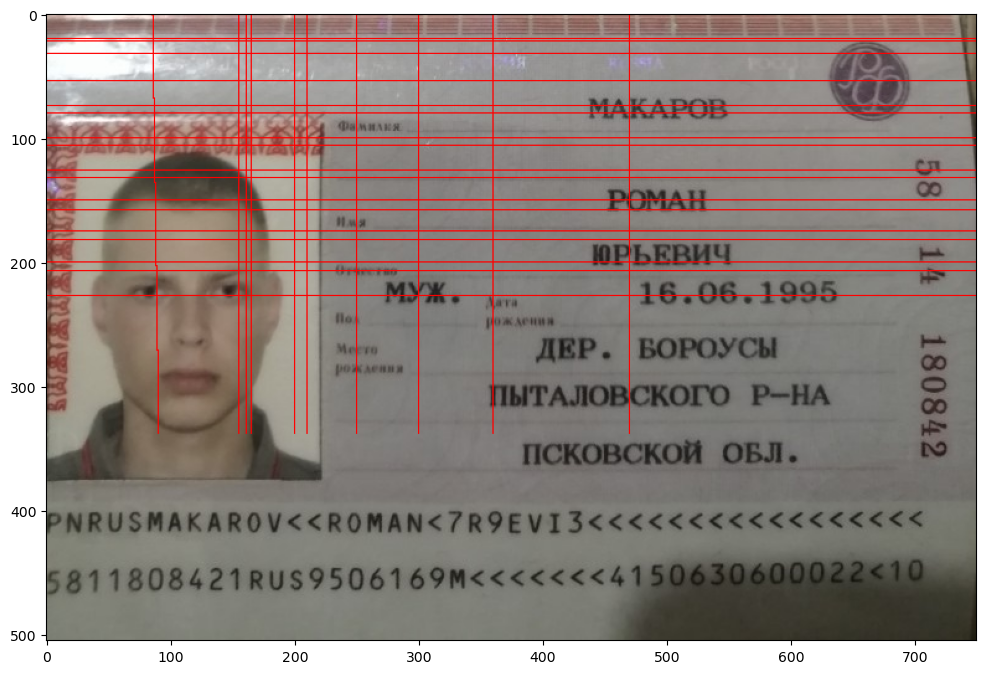

In [5]:
line = cv2.line(img.astype('uint8'), (0, 54), (img.shape[1], 54), (255, 0, 0), 1, 1)
line2 = cv2.line(line, (0, 74), (img.shape[1], 74), (255, 0, 0), 1, 1)
line3 = cv2.line(line, (161, 0), (161, 338), (255, 0, 0), 1, 1)
line4 = cv2.line(line, (0, 80), (img.shape[1], 80), (255, 0, 0), 1, 1)
line5 = cv2.line(line, (0, 100), (img.shape[1], 100), (255, 0, 0), 1, 1)
line6 = cv2.line(line, (0, 106), (img.shape[1], 106), (255, 0, 0), 1, 1)
line7 = cv2.line(line, (0, 126), (img.shape[1], 126), (255, 0, 0), 1, 1)
line8 = cv2.line(line, (0, 132), (img.shape[1], 132), (255, 0, 0), 1, 1)
line9 = cv2.line(line, (0, 150), (img.shape[1], 150), (255, 0, 0), 1, 1)
line10 = cv2.line(line, (0, 158), (img.shape[1], 158), (255, 0, 0), 1, 1)
line11 = cv2.line(line, (0, 175), (img.shape[1], 175), (255, 0, 0), 1, 1)
line12 = cv2.line(line, (0, 182), (img.shape[1], 182), (255, 0, 0), 1, 1)
line13 = cv2.line(line, (0, 200), (img.shape[1], 200), (255, 0, 0), 1, 1)
line14 = cv2.line(line, (0, 207), (img.shape[1], 207), (255, 0, 0), 1, 1)
line15 = cv2.line(line, (0, 227), (img.shape[1], 227), (255, 0, 0), 1, 1)
line16 = cv2.line(line, (200, 0), (200, 338), (255, 0, 0), 1, 1)
line17 = cv2.line(line, (0, 20), (img.shape[1], 20), (255, 0, 0), 1, 1)
line18 = cv2.line(line, (0, 22), (img.shape[1], 22), (255, 0, 0), 1, 1)
line19 = cv2.line(line, (0, 32), (img.shape[1], 32), (255, 0, 0), 1, 1)
line20 = cv2.line(line, (85, 0), (90, 338), (255, 0, 0), 1, 1)
line21 = cv2.line(line, (155, 0), (155, 338), (255, 0, 0), 1, 1)
line22 = cv2.line(line, (165, 0), (165, 338), (255, 0, 0), 1, 1)
line23 = cv2.line(line, (210, 0), (210, 338), (255, 0, 0), 1, 1)
line24 = cv2.line(line, (250, 0), (250, 338), (255, 0, 0), 1, 1)
line25 = cv2.line(line, (300, 0), (300, 338), (255, 0, 0), 1, 1)
line26 = cv2.line(line, (360, 0), (360, 338), (255, 0, 0), 1, 1)
line27 = cv2.line(line, (470, 0), (470, 338), (255, 0, 0), 1, 1)
show(line27)

In [6]:
def results_function(dictionary, x, y, roi):
    regions = {
           "Surname": {"x": (400,700), "y": (70, 100)},
           "Name": {"x": (400,700), "y": (125, 170)},
           "Patronymic": {"x": (400,700), "y": (170, 215)},
          }

    # check if Surname
    if x > regions["Surname"]["x"][0] and y in range(regions["Surname"]["y"][0], regions["Surname"]["y"][1]):
        dictionary["Surname"]["ROI"] = roi
    # check if Name
    if x > regions["Name"]["x"][0] and y in range(regions["Name"]["y"][0], regions["Name"]["y"][1]):
        dictionary["Name"]["ROI"] = roi
    # check if Patronymic
    if x > regions["Patronymic"]["x"][0] and y in range(regions["Patronymic"]["y"][0], regions["Patronymic"]["y"][1]):
        dictionary["Patronymic"]["ROI"] = roi
        
    return dictionary

In [7]:
def text_generator(dictionary, key):
    kernel = np.ones((7, 7), np.uint8)
    resized = cv2.resize(dictionary[key]["ROI"].astype("uint8"), None, fx = 15, fy = 15, interpolation=cv2.INTER_CUBIC)
    _, thresh = cv2.threshold(resized, 100, 255, cv2.THRESH_BINARY)
    dictionary[key]["Processed ROI"] = thresh
    text = pytesseract.image_to_data(thresh, output_type=Output.DICT, lang='rus', config = "--psm 10")
    
    if key == "MRZ":
        text = pytesseract.image_to_data(thresh, output_type=Output.DICT, lang='rus')
        filtered_confidence = [i for i in text['conf'] if i != '-1']
        count = 0 
        for i in filtered_confidence:
            count += i
        average_confidence = count / len(filtered_confidence)    
        return ("".join(text['text']), filtered_confidence, average_confidence)
    else:
        text = pytesseract.image_to_data(thresh, output_type=Output.DICT, lang='rus', config = "--psm 10")
        filtered_confidence = [i for i in text['conf'] if i != '-1']
        count = 0 
        for i in filtered_confidence:
            count += i
        average_confidence = count / len(filtered_confidence)
        return (" ".join(text['text']).lstrip(), filtered_confidence, average_confidence)

After Gaussian Blur


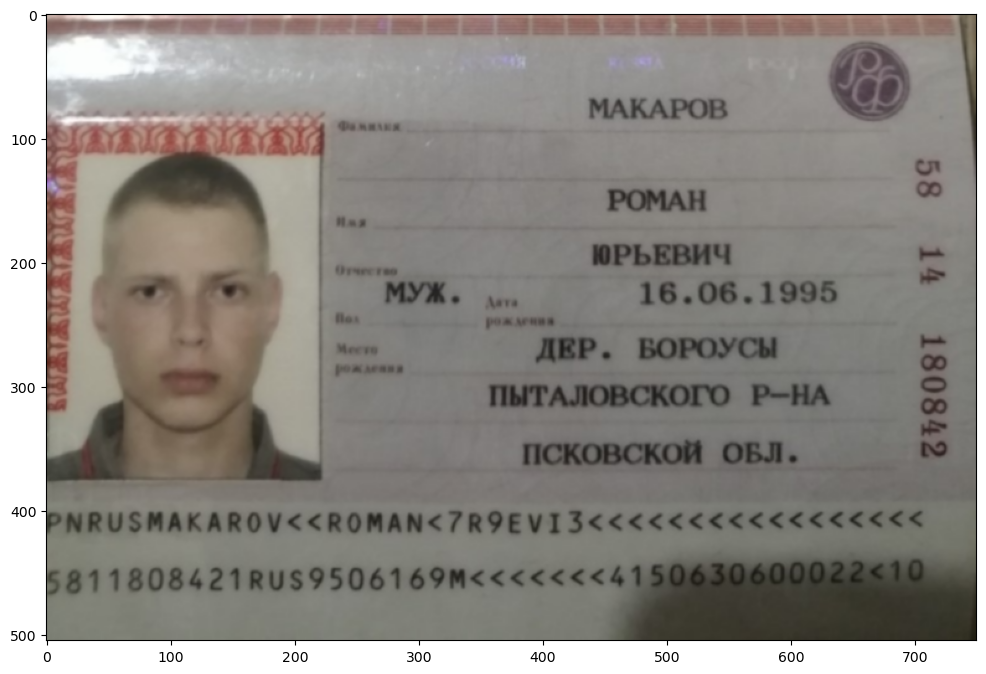

After Blackhat


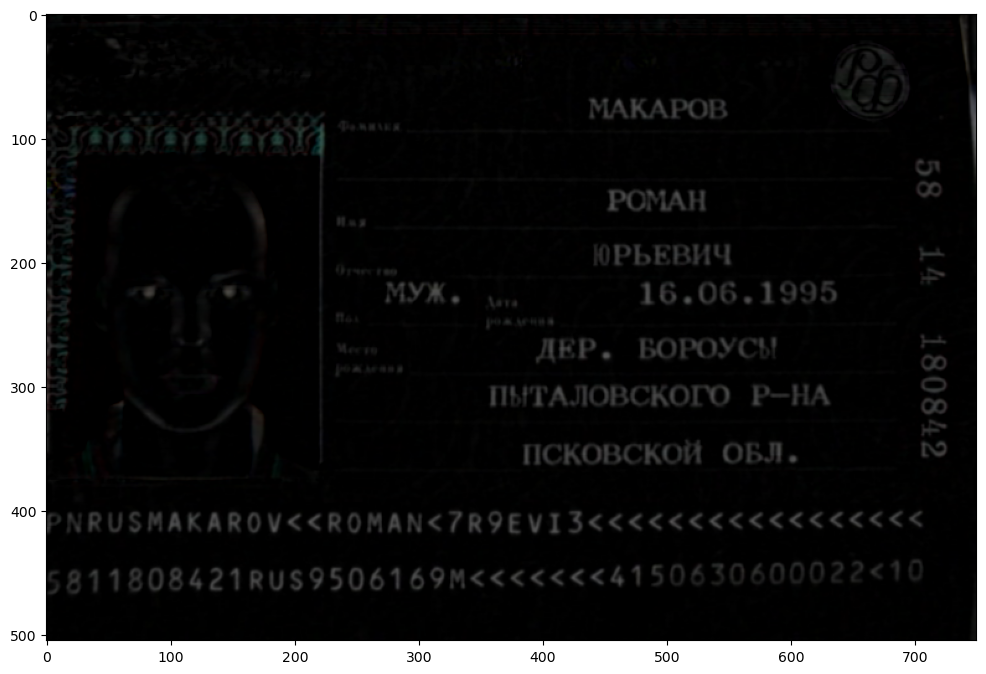

In [8]:
# smooth the image using a 3x3 Gaussian, then apply the blackhat
# morphological operator to find dark regions on a light background
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 21))

print('After Gaussian Blur')
gray = cv2.GaussianBlur(img, (3, 3), 0)
show(gray)

print('After Blackhat')
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)
show(blackhat)

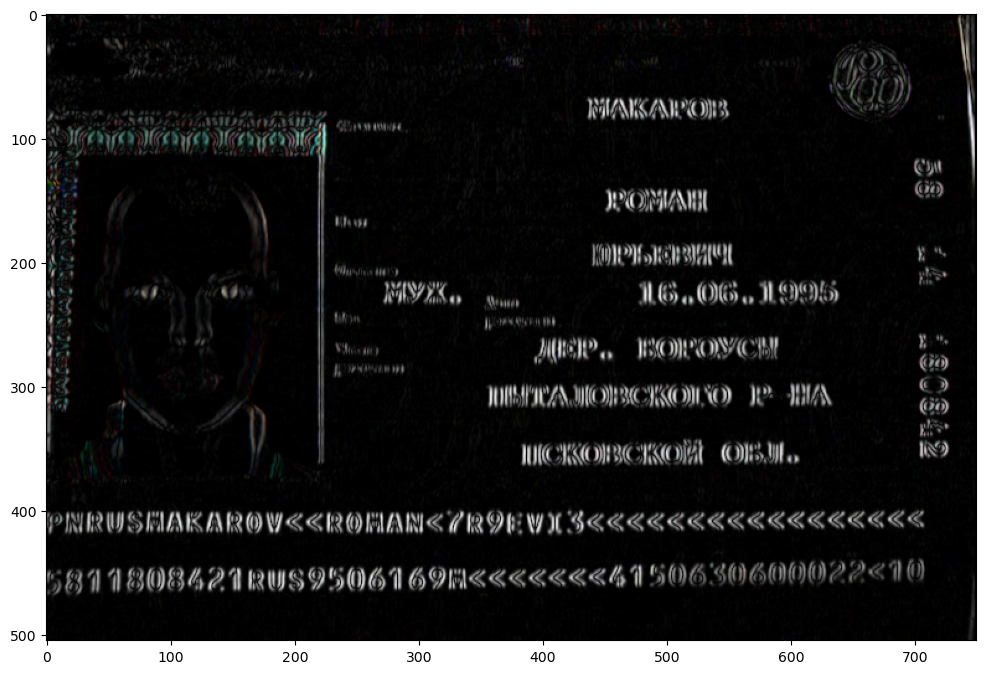

In [9]:
# compute the Scharr gradient of the blackhat image and scale the result into the range [0, 255]
# this is to detect strong vertical changes
gradX = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = (255 * ((gradX - minVal) / (maxVal - minVal))).astype("uint8")
show(gradX)

In [10]:
# apply a closing operation using the rectangular kernel to close
# gaps in between letters -- then apply Otsu's thresholding method
gradX = cv2.morphologyEx(cv2.cvtColor(gradX, cv2.COLOR_BGR2GRAY), cv2.MORPH_CLOSE, rectKernel)
print('AFTER CLOSING OPERATION')
show(cv2.cvtColor(gradX, cv2.COLOR_GRAY2BGR))
print('AFTER THRESHOLDING')
thresh = cv2.threshold(gradX, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
show(thresh)

AFTER CLOSING OPERATION


AFTER THRESHOLDING


NUMBER OF IDENTIFIED COUNTOURS AFTER APPLYING AREA FILTER:38 out of 56


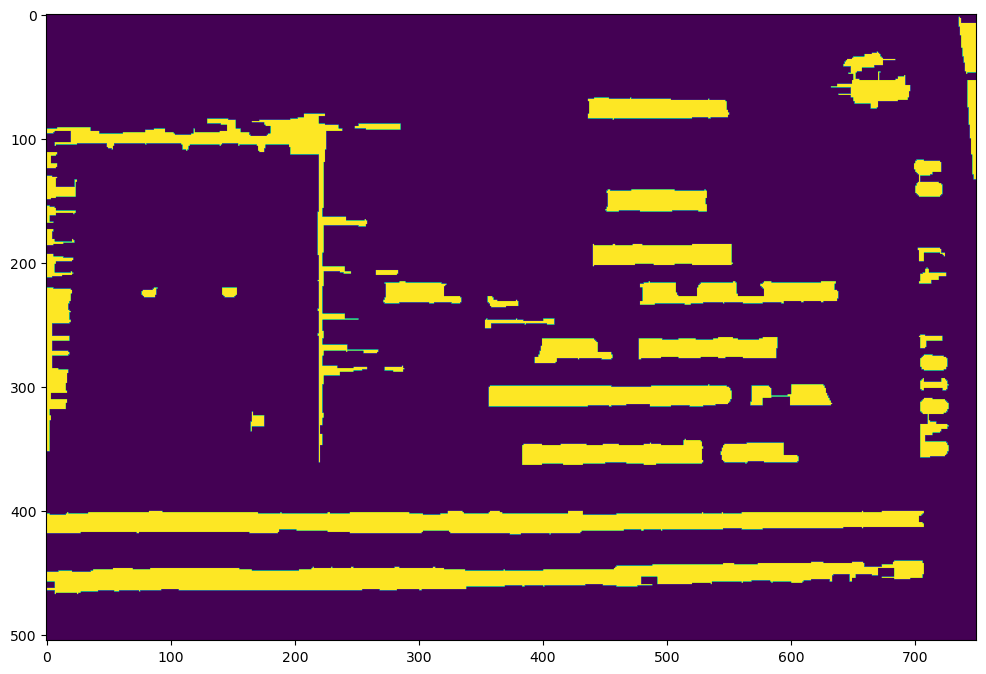

In [11]:
mask = np.zeros(gradX.shape, dtype=np.uint8)

# Find contours and filter using contour area
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
count = 0
filtered_countours = []
for c in cnts:
    # apply area to remove small blobs
    area = cv2.contourArea(c)
    if area > 25:
        cv2.drawContours(mask, [c], -1, (255,255,255), -1)
        count += 1
        filtered_countours.append(c)

print("NUMBER OF IDENTIFIED COUNTOURS AFTER APPLYING AREA FILTER:" + str(count) + " out of " + str(len(cnts)))
show(mask)

In [12]:
final_image = img.astype('int32')

# We point OpenCV's CascadeClassifier function to where our
# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(img, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
face_rectangle = []
for (x, y, w, h) in faces:
    x = x - 25 # Padding trick to take the whole face not just Haarcascades points
    y = y - 40 # Same here...
    cv2.rectangle(final_image, (x, y), (x + w + 45, y + h + 70), (0, 255, 0), 1)
    face_rectangle.append([(x, y), (x + w + 45, y + h + 70)])

show(final_image)

C:\Users\User\AppData\Local\Temp\ipykernel_1076\3804425004.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if faces == ():


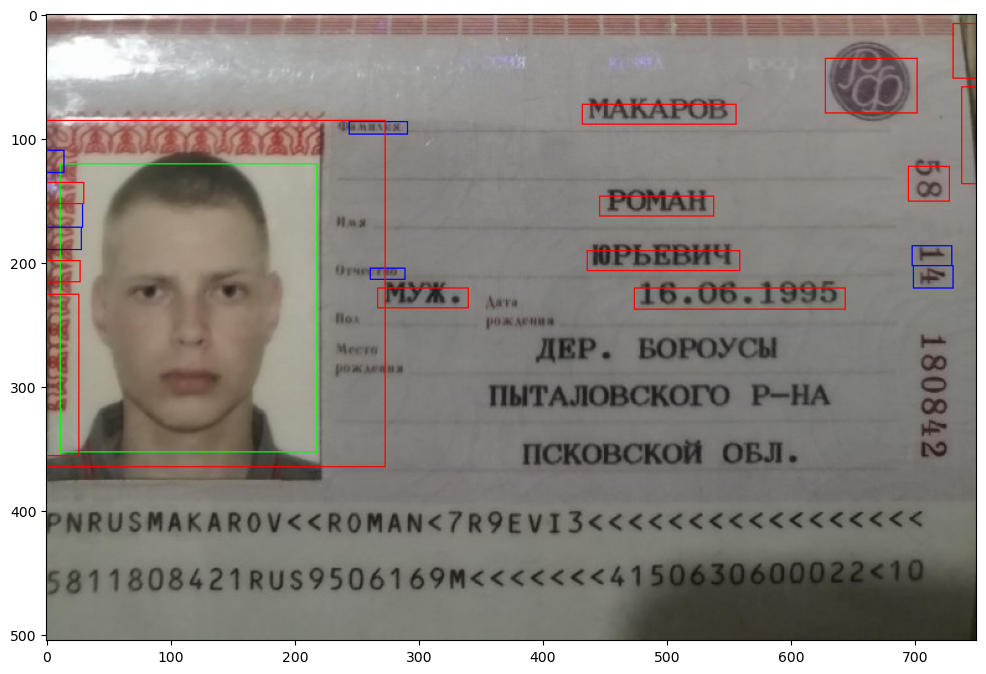

In [13]:
final_image_2 = final_image
# get the x and y range for the detected face. This is used for filtering out any blobs that 
# are identified within this range
face_width_range = range(face_rectangle[0][0][0], face_rectangle[0][0][0] + face_rectangle[0][1][0] - 20)
face_height_range = range(face_rectangle[0][0][1], face_rectangle[0][0][1] + face_rectangle[0][1][1])

roi_list = []

for c in filtered_countours:
    (x, y, w, h) = cv2.boundingRect(c)
    # to filter out any blobs within detected face
    x_width = 5
    if x in face_width_range and y in face_height_range or y > 250:
        continue
    else:        
        if x >= 350 and y > 220:
            continue    
        elif (x >= 90 and x <= 100) and (y <= 25):
            # PASSPORT CORRECTION - GREEN
            y_correction = 9
            roi = final_image[y + y_correction :y + h + 3, x - x_width :x + w + 5].copy()
            roi_list.append(roi)
            results = results_function(results, x- x_width, y + y_correction, roi)
            cv2.rectangle(final_image_2, (x - 5 , y + 9), (x + w + x_width, y + h + 3), (0, 255, 0), 1)
        elif h >= 16:
            # RED 
            y_correction = 5 
            roi = final_image[y + y_correction :y + h + 3, x - x_width :x + w + 5].copy()
            roi_list.append(roi)
            results = results_function(results, x- x_width, y + y_correction, roi)
            cv2.rectangle(final_image_2, (x - 5 , y + 5), (x + w + x_width, y + h + 3), (255, 0, 0), 1)
        else:
            # BLUE
            y_correction = 3
            roi = final_image[y - y_correction :y + h + 3, x:x + w].copy()
            roi_list.append(roi)
            results = results_function(results, x, y - y_correction, roi)
            cv2.rectangle(final_image_2, (x - 5, y - 2), (x + w + x_width, y + h + 3), (0, 0, 255), 1)

show(final_image_2)

In [14]:
# perform another closing operation, this time using the square
# kernel to close gaps between lines of the MRZ, then perform a
# series of erosions to break apart connected components
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)
# thresh = cv2.erode(thresh, 0, iterations=4)

# during thresholding, it's possible that border pixels were
# included in the thresholding, so let's set 5% of the left and
# right borders to zero
p = int(gray.shape[1] * 0.05)
thresh[:, 0:p] = 0
thresh[:, gray.shape[1] - p:] = 0
show(thresh)

# find contours in the thresholded image and sort them by their size
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

In [15]:
mrz = None

# loop over the contours
for c in cnts:
    # compute the bounding box of the contour and use the contour to
    # compute the aspect ratio and coverage ratio of the bounding box
    # width to the width of the image
    (x, y, w, h) = cv2.boundingRect(c)
    ar = w / float(h)
    crWidth = w / float(gray.shape[1])

    # check to see if the aspect ratio and coverage width are within
    # acceptable criteria
    if ar > 5 and crWidth > 0.75:
        # pad the bounding box since we applied erosions and now need
        # to re-grow it
        pX = int((x + w) * 0.03)
        pY = int((y + h) * 0.03)
        (x, y) = (x - pX, y - pY)
        (w, h) = (w + (pX * 2), h + (pY * 2))

        # extract the ROI from the image and draw a bounding box
        # surrounding the MRZ
        roi = final_image_2[y-5:y + h+5, x:x + w].copy()
        mrz = roi
        results["MRZ"]["ROI"] = roi
        cv2.rectangle(final_image_2, (x, y), (x + w, y + h), (0, 255, 0), 1)
        break

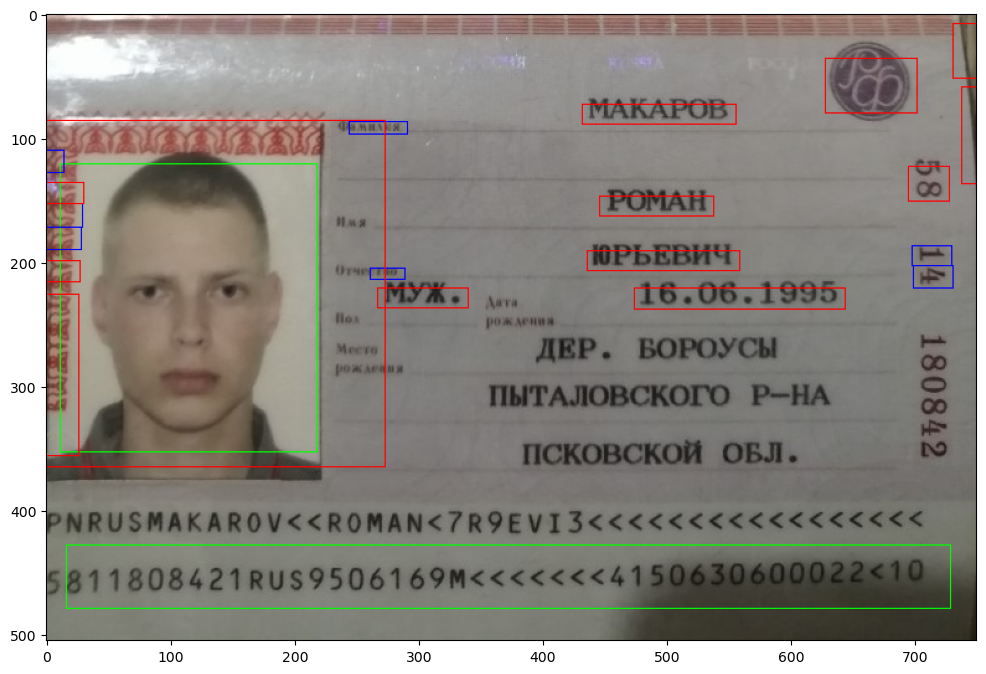

In [16]:
show(final_image_2)

In [17]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

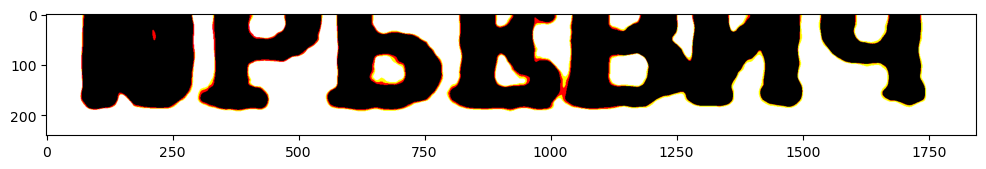

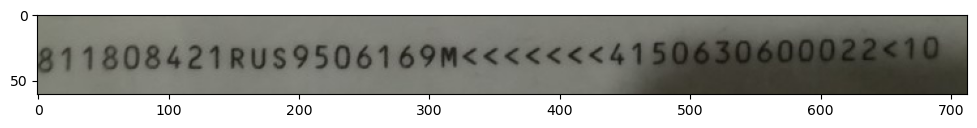

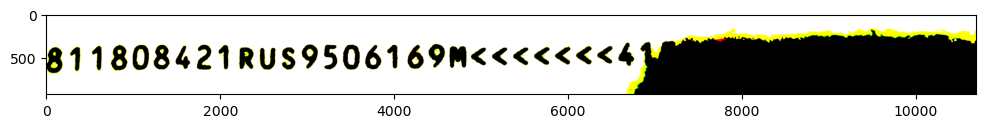

In [18]:
for key in results.keys():
    output = text_generator(results, key)
    results[key]['Text'] = output[0]
    results[key]['Confidence'] = output[1]
    results[key]['Average Confidence'] = output[2]
    show(results[key]['ROI'])
    show(results[key]['Processed ROI'])